# 05 - Plotting Rockefeller and UTSW Together

## Imports

In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import avn.dataloading as dataloading
import avn.segmentation as segmentation
import avn.plotting
import math
import sklearn
import seaborn as sns

## Onsets

In [2]:
rock_seg_metrics = pd.read_csv('C:\\Grad_School\\Code_and_software\\Py_code\\WhisperSeg_validation\\wseg_RMSE_tweety_F1s_rock.csv')
rock_seg_metrics['Colony'] = 'Rockefeller'
utsw_seg_metrics = pd.read_csv('C:\\Grad_School\\Code_and_software\\Py_code\\WhisperSeg_validation\\wseg_RMSE_tweety_F1s.csv')
utsw_seg_metrics['Colony'] = 'UTSW'

all_seg_metrics = pd.concat([utsw_seg_metrics, rock_seg_metrics])

In [3]:
all_seg_metrics = all_seg_metrics[all_seg_metrics.max_gap == 0.01]

In [4]:
all_seg_metrics.method = pd.Categorical(all_seg_metrics.method).reorder_categories(['RMSE', 'Tweety_net', 'whisper_seg'])
all_seg_metrics.method = all_seg_metrics.method.cat.rename_categories({'Tweety_net' : "TweetyNet", 
                                                                       'whisper_seg' : "WhisperSeg"})

In [8]:
plt.rcParams.update({'font.size': 10})

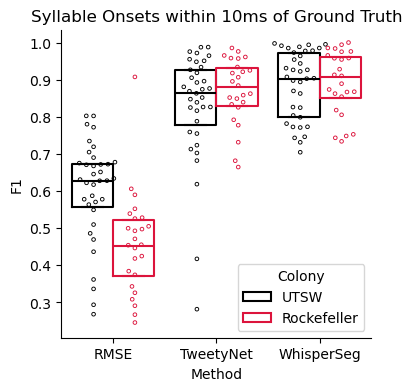

In [12]:
plt.figure(figsize = (4, 4))
sns.swarmplot(data = all_seg_metrics, x = 'method', y = 'F1', hue = 'Colony', s = 5, marker = "$\circ$",
             dodge = True, legend = False, palette = ['black', 'crimson'])
sns.boxplot(data = all_seg_metrics, x = 'method', y = 'F1', fill = False, hue = 'Colony', fliersize=0, whis = 0, 
            palette = ['black', 'crimson'])
plt.title("Syllable Onsets within 10ms of Ground Truth")
plt.xlabel('Method')
sns.despine()

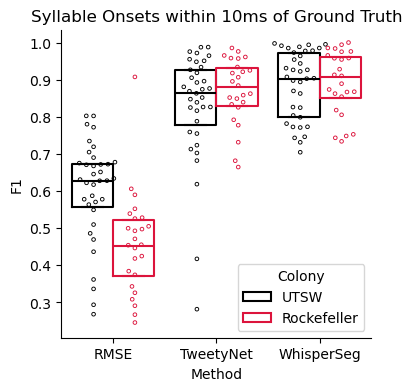

In [14]:
plt.figure(figsize = (4, 4))
sns.swarmplot(data = all_seg_metrics, x = 'method', y = 'F1', hue = 'Colony', s = 5, marker = "$\circ$",
             dodge = True, legend = False, palette = ['black', 'crimson'])
sns.boxplot(data = all_seg_metrics, x = 'method', y = 'F1', fill = False, hue = 'Colony', fliersize=0, whis = 0, 
            palette = ['black', 'crimson'])
plt.title("Syllable Onsets within 10ms of Ground Truth")
plt.xlabel('Method')
sns.despine()
plt.savefig('syll_onset_f1_ut&rock.svg', transparent = True)